# Exploring the matter power spectrum, P(k)
---

- why do we look at P(k)
    - anisotropies in CMB by itself don't give any info, it is through the 2pt functions that we can actually obtain the matter power spectrum P(k)
    - this forms a link between the hteoty and observations
- why do we look at the contributions
    - every perturbation affects the matter power spectrum in a unique(/different) way
- theoretical matter power spectrum


---

## Effect of parameters on P(k)
---
In this notebook we vary the parameters given in the CCL cosmology and plot the effects this has on the matter power spectrum. 
We will aim to produce one plot in which all parameters, of the $\Lambda CDM$ model, are varied within the range of known priors(presented in Planck and DES papers). Thus, such a plot will contain about 6 to 7 subplots. We will make this selection of subplots for different values of the reddshift(z). Since we have to specify the scalefactor(a), we find the corresponding a through: $a (t) = \frac{1}{1+z}$ such that we get the following, for the values:
- $z = 0 --> a = 1$
- $z = 0.5 --> a = 0.667$
- $z = 1 --> a = 0.5$
- $z = 1.5 --> a = 0.4$

The main idea is to develope an intuition for the effect of the $ \Lambda CDM$ parameters on the matter power spectrum. [Ref: CCLX examples - Matter power spectrum](https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb)

---
**Priors**
We consider a flat universe for this part of the exploration of the parameter dependencies of P(k), so we'll set: $\Omega_{k} = 0$. In other words, we consider a vanilla $\Lambda CDM$ universe. The variations within eacht parameter is done within the range of the following priors:
- $\Omega_{CDM} \left(\Omega_{c}\right) \quad \in \quad \left(0.1, 0.9\right)$
- $\Omega_{b} \quad \in \quad \left(0.03, 0.07\right)$
- $h \left(H_{0}\right) \quad \in \quad \left(55, 91\right) \left[ kms^{-1}Mpc^{-1}\right]$
- $A_{s} \quad \in \quad \left(0.5e-9, 5.0e-9\right)$
- $n_{s} \quad \in \quad \left(0.87, 1.07\right)$
- $N_{eff} \quad \in \quad \left(0.044, 6.044\right)$. Note that this is correlated with the parameters below, we can best define the masses of the neutrinos or its sum. From this info, and $N_{eff}$, the number of relativistic neutrinos is determined.
- $\sum m_{\nu}$ [eV] $\quad \in \quad \left(0, 1\right)$
- $\Omega_{\nu} \quad \in \quad \left(6.0, 64.4\right)$ [$10^{-4}h^{2}$]
- $\omega \quad \in \quad \left(-2.0, -0.33\right)$, fixed at $\omega = -1$

NOTE: For the ranges of the parameters given by the priors, we refer to:
- [Planck](planck-paper link)
    - [Ade, P. A., Aghanim, N., Armitage-Caplan, C., Arnaud, M., Ashdown, M., Atrio-Barandela, F., ... & Mazzotta, P. (2014). Planck 2013 results. XV. CMB power spectra and likelihood. Astronomy & Astrophysics, 571, A15.](https://arxiv.org/abs/1303.5075) found in *Table 5*
    - [Ade, P. A., Aghanim, N., Arnaud, M., Ashdown, M., Aumont, J., Baccigalupi, C., ... & Matarrese, S. (2016). Planck 2015 results-xiii. cosmological parameters. Astronomy & Astrophysics, 594, A13.](https://arxiv.org/abs/1303.5076), looking at *Table I*
    - [Chen, L., Huang, Q. G., & Wang, K. (2019). Distance priors from Planck final release. Journal of Cosmology and Astroparticle Physics, 2019(02), 028.](https://arxiv.org/abs/1808.05724), Appendix A describes the priors quasi-crypticly
- [DES](des-paper link)
    - [Abbott, T. M. C., Acevedo, M., Adamow, M., Aguena, M., Alarcon, A., Allam, S., ... & DES Collaboration. (2025). Dark Energy Survey: implications for cosmological expansion models from the final DES Baryon Acoustic Oscillation and Supernova data. arXiv preprint arXiv:2503.06712.](https://arxiv.org/pdf/2503.06712) given the priors of *Table I* (NOTE: we could also refer to the constraints in *Table V*)
    - [Krause, E., Fang, X., Pandey, S., Secco, L. F., Alves, O., Huang, H., ... & Weller, J. (2021). Dark energy survey year 3 results: Multi-probe modeling strategy and validation. arXiv preprint arXiv:2105.13548.](https://arxiv.org/pdf/2105.13548) given the priors from *Table II*


In [28]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:
import pyccl as ccl
import numpy as np
import math
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as mcolors

### Loop functions

In [29]:
# Because the cosmology in not mutable, we must redefine the cosmology each time we vary a parameter. Define the functions:

# Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso_lin(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_lin = [] # This is the output list we will plot from, in this array we gather all different
    
    # The standard values, in a dictionary:
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a)
        power_spectra_lin.append(p_k_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_lin)

# Also set up a loop function that returns the non linear matter power spectrum in all variations:
def loop_comso_non_lin(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_non_lin = [] # This is the output list we will plot from, in this array we gather all different 
    
    # The standard values, in a dictionary:
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_non_lin_i = ccl.nonlin_matter_power(cosmo_i, k, a)
        power_spectra_non_lin.append(p_k_non_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_non_lin)


# z = 0, a = 1, linear spectra
Now we define the cosmology for the case of a redshoft of zero (z=0); and vary the parameters within this redshoft bin before plotting them all into a signle plot, using subplots.
In essence we can put all the code into one cell, however: we choose to treat each redshift in itself, this is mainly for overview purposes.
NOTE: we assume a flat universe in all cases; $\Omega_{k} = 0$

/tmp/ipykernel_1844/976752671.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


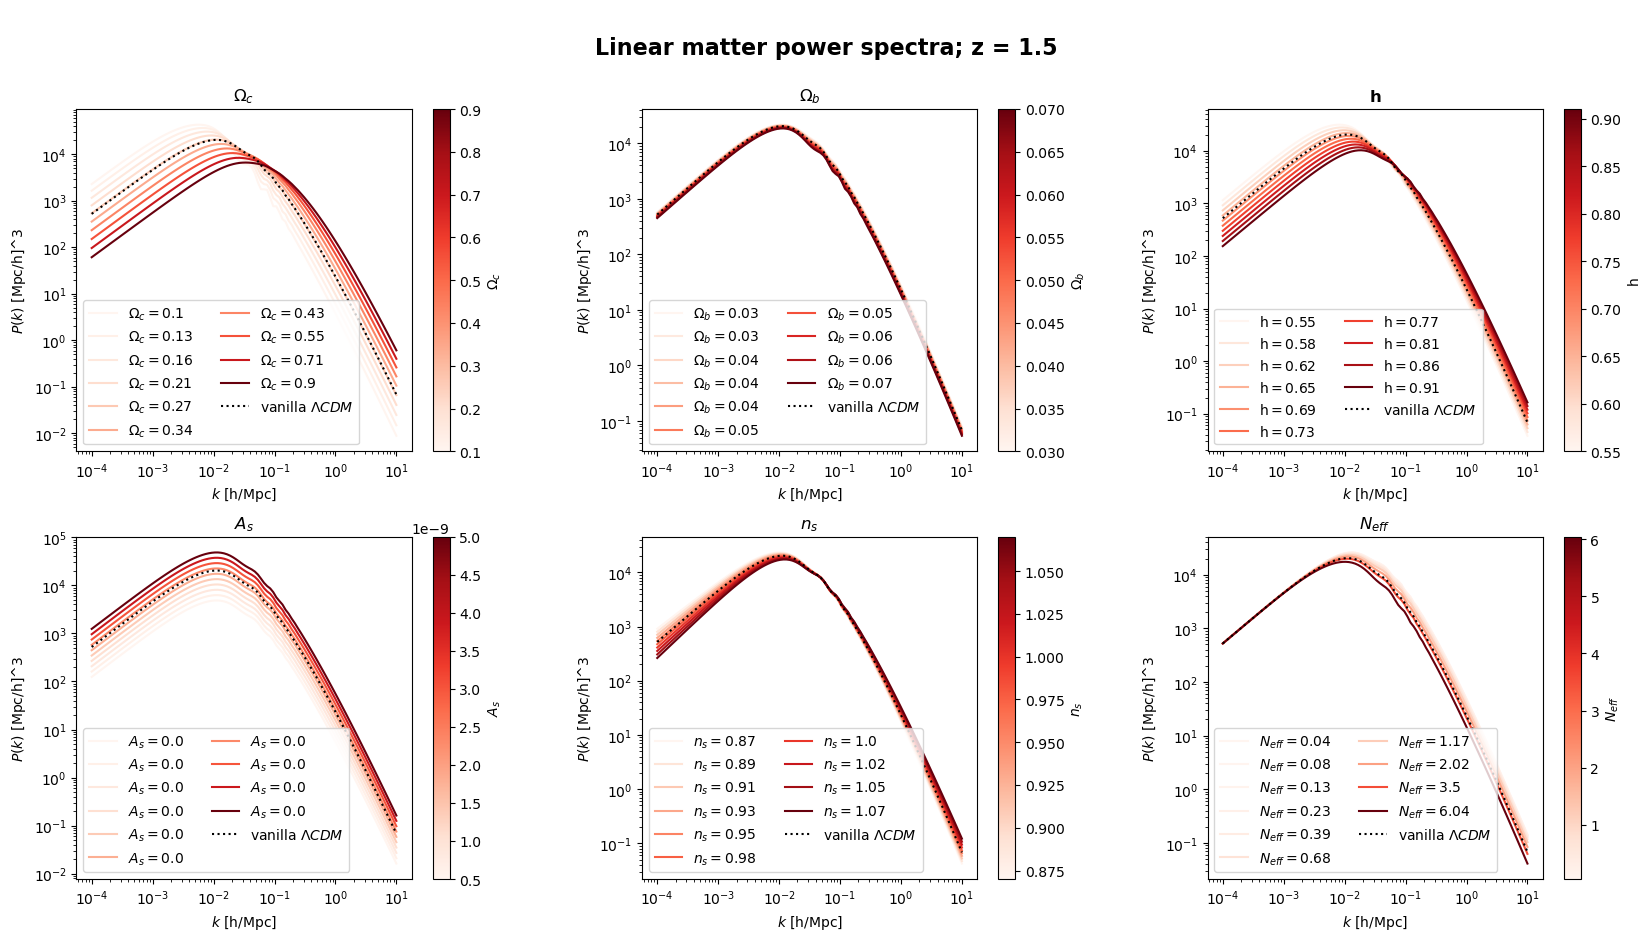

In [54]:
# Considering the found priors, we define the cosmology:
om_c_prior = np.geomspace(0.1, 0.9, 10) # these are random; just a trial. The deviations might be too large
om_b_prior = np.geomspace(0.03, 0.07, 10)
h_prior = np.geomspace(0.55, 0.91, 10)
a_s_prior = np.geomspace(0.5e-9, 5.0e-9, 10)
n_s_prior = np.geomspace(0.87, 1.07, 10)
n_eff_prior = np.geomspace(0.044, 6.044, 10)
de_prior = np.geomspace(-3, -0.33)

"""
# First result, taking symmetric variations around the vanilla LCDM parameters
om_c_prior = [0.13, 0.20, 0.27, 0.34, 0.41] # these are random; just a trial. The deviations might be too large
om_b_prior = [0.005, 0.025, 0.045, 0.065, 0.085]
h_prior = [0.55, 0.62, 0.67, 0.72, 0.77]
a_s_prior = [1.05e-9, 1.505e-9, 2.1e-9, 3.2e-9, 4.2e-9]
n_s_prior = [0.88, 0.92, 0.96, 1, 1.04]
n_eff_prior = [0.044, 1.544, 3.044, 4.544, 6.044]
"""

# Combine into one list of all priors, for plotting purposes:
priors = [om_c_prior, om_b_prior, h_prior, a_s_prior, n_s_prior, n_eff_prior]

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 100
k = np.geomspace(kmin, kmax, nk) # np.linspace(kmin, kmax, nk) # Try linspace ---> np.geomspace() or maybe np.logspace(); geomspace makes the curve smooth
a = 0.4 # scale factor

# Define the linear matter power spectrum for the "vanilla LCDM" model:
cosmology = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")
vanilla_lcdm = ccl.linear_matter_power(cosmology, k, a)

# The standard values, in a dictionary:
pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96} # Here we have a reference list of the parameters. This will be altered slightly in the loop.
keys = list(pars)

# For elegance in our plot:
keys[0], keys[1], keys[3], keys[4] = r"$\Omega_c$", r"$\Omega_b$", r"$A_s$", r"$n_s$"
keys.append(r"$N_{eff}$")

"""
# Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso_lin(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_lin = [] # This is the output list we will plot from, in this array we gather all different
    
    # The standard values, in a dictionary:
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a)
        power_spectra_lin.append(p_k_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_lin)
 """

# Now we generate all the variations:
var_om_c_lin = loop_comso_lin(om_c_prior, r"Omega_c")
var_om_b_lin = loop_comso_lin(om_b_prior, r"Omega_b")
var_h_lin = loop_comso_lin(h_prior, r"h")
var_a_s_lin = loop_comso_lin(a_s_prior, r"A_s")
var_n_s_lin = loop_comso_lin(n_s_prior, r"n_s")
var_n_eff_lin = loop_comso_lin(n_eff_prior, r"Neff")
var_de_lin = loop_comso_lin(de_prior, r"w0")

# Similar to the priors, put all the power spectra in a list:
lin_P_k = (var_om_c_lin, var_om_b_lin, var_h_lin, var_a_s_lin, var_n_s_lin, var_n_eff_lin)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
fig.suptitle("\nLinear matter power spectra; z = 1.5", weight="bold", fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=0.35)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 3):
    # Define the range of the colors in the plot
    norm_row1 = mcolors.Normalize(vmin=min(priors[j]), vmax=max(priors[j]))
    norm_row2 = mcolors.Normalize(vmin=min(priors[j + 3]), vmax=max(priors[j + 3]))
    for i in range(len(priors[0])):

        # Make a ScalarMappable for the colorbar
        color_row1 = cmap(norm_row1(priors[j][i]))
        sm_row1 = cm.ScalarMappable(cmap=cmap, norm=norm_row1)
        sm_row1.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[0, j].loglog(k, lin_P_k[j][i], color=color_row1, label=keys[j] + r"$= {}$".format(np.round(priors[j][i], 2)))
        
        # Add titles, labels:
        axes[0, j].set_title(keys[j], weight="bold")
        axes[0, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[0, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
        
        # Second row:
        # Set up the colors:
        color_row2 = cmap(norm_row2(priors[j + 3][i]))
        sm_row2 = cm.ScalarMappable(cmap=cmap, norm=norm_row2)
        sm_row2.set_array([])  # To avoid errors

        axes[1, j].loglog(k, lin_P_k[j + 3][i], color=color_row2, label=keys[j + 3] + r"$= {}$".format(np.round(priors[j + 3][i], 2)))
        
        # Add titles, labels:
        axes[1, j].set_title(keys[j + 3], weight="bold")
        axes[1, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[1, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar_row1 = fig.colorbar(sm_row1, ax=axes[0, j], label=keys[j])
    cbar_row2 = fig.colorbar(sm_row2, ax=axes[1, j], label=keys[j + 3])

    # Plot the reference value for "vanilla-LCDM" and the legend himself:
    axes[0, j].loglog(k, vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$")
    axes[0, j].legend(loc=0, ncols=2)
    axes[1, j].loglog(k, vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$")
    axes[1, j].legend(loc=0, ncols=2)

plt.show()

## Interpretation
Looking at th varuations in in the matter power spectrum:

- $\Omega_{c}$:
    Some clear trends in varying the CDM density are:
    - An inverse scaling with the amplitude
    - A (uniform) shift of the spectrum to the right (smaller scales)
    - For a small $\Omega_{c}$ the Baryon Acoustic Oscillations (BAO) in the scale regime right under the matter-radiation equality peak(linear to quasi-linear regime) are enhanced significantly.
    - For large $\Omega_{c}$ BAO are (completely) suppressed.
    (the changed mainly through the change in relative balance of mass budget)
- $\Omega_{b}$:
    Some trends in varying the bayon density are:
    - A subtle inverse scaling with the amplitude
    - For a larger $\Omega_{b}$ the Baryon Acoustic Oscillations (BAO) in the scale regime right under the matter-radiation equality peak(linear to quasi-linear regime) are (slightly) enhanced.
    - For smaller $\Omega_{b}$ BAO are smaller.
    (BAO related to the $\Omega_{b}$, but the amplitude of $\Omega_{b}$ small compared to $\Omega_{c}$, thus the effects are small outside of the BAO)
- $H_{0}$:
    - Inverse scaling with the amplitude in the linear part, on larger scales;
    - proportinality scaling on scales smaller than the matter-radiation peak. In this regime the effect is also smaller
    - Larger $H_{0}$ shows slightly more prominent BAO
    - Small $H_{0}$ seems to suppress the BAO, difference between these last two is smaller
    Expansion rate could counter matter clustering, thus lower the large scale structure?
- $A_{s}$:
    - Proportionality with the amplitude (thats what $A_{s}$ is) that seems stronger for lower values of the of $A_{s}$ and seems to weaken slightly for larger $A_{s}$, where the difference between the lines becomes smaller.
- $n_{s}$:
    - Inverse amplitude scaling on larger scales
    - proportional amplitude scaling on smaller scales
    - The amplitude seems to be invariant to $n_{s}$ in the BAO regime
    - On larger scales, with increasing $n_{s}$ the slope steepens
    - roughly uniform curve upon changes in $n_{s}$
- $N_{eff}$:
    - invariance on larger scales
    - inverse amplitude scaling on smaller scales
    - BAO peaks spread out slightly as $N_{eff}$ increases
- Redshift z(or scale factor a(t)):
    The redshift doesn't seem to affect the curve of P(k) itself too much, other than the overall amplitude, for larger redshift(earlier in the universe) the overal amplitude changes significantly.

# Non-linear matter power spectrum
Look at the same plot, using the same code but change to the non-linear matter power spectrum:

/tmp/ipykernel_1844/1296711025.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


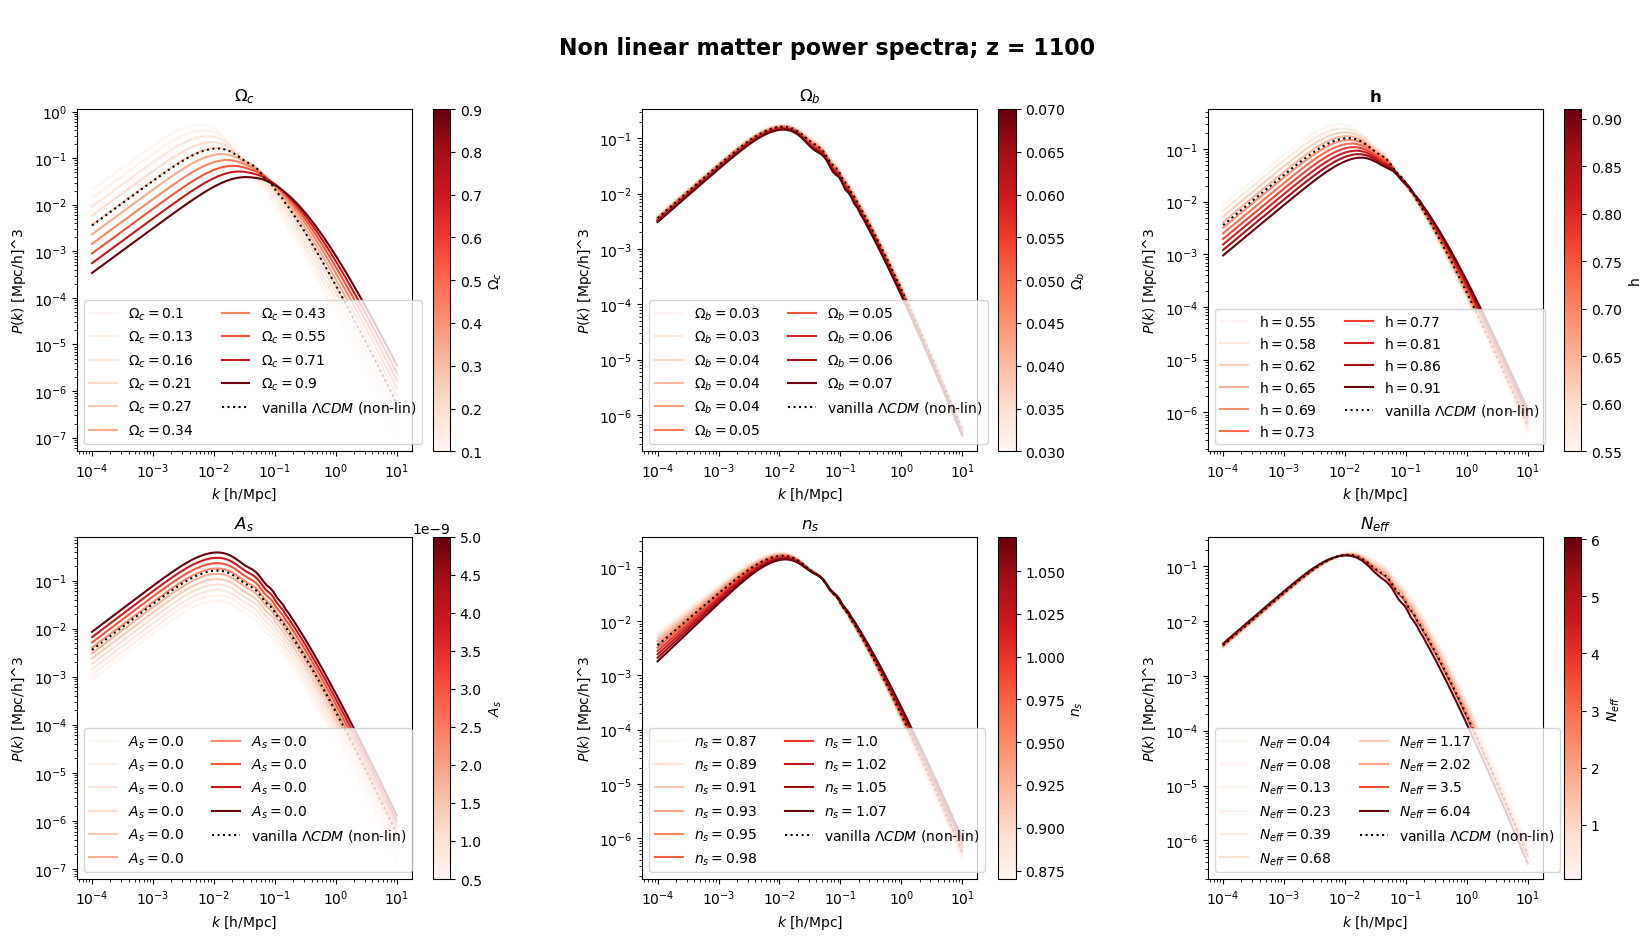

In [31]:
# To be able to change the scalefactor, redefine it here again:
a = 1/1101 # scale factor

# Non linear vanilla LCDM:
nonlin_vanilla_lcdm = ccl.nonlin_matter_power(cosmology, k, a)

"""
# Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso_non_lin(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_non_lin = [] # This is the output list we will plot from, in this array we gather all different 
    
    # The standard values, in a dictionary:
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_non_lin_i = ccl.nonlin_matter_power(cosmo_i, k, a)
        power_spectra_non_lin.append(p_k_non_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_non_lin)
    """

# Now we generate all the variations:
var_om_c_non_lin = loop_comso_non_lin(om_c_prior, r"Omega_c")
var_om_b_non_lin = loop_comso_non_lin(om_b_prior, r"Omega_b")
var_h_non_lin = loop_comso_non_lin(h_prior, r"h")
var_a_s_non_lin = loop_comso_non_lin(a_s_prior, r"A_s")
var_n_s_non_lin = loop_comso_non_lin(n_s_prior, r"n_s")
var_n_non_eff = loop_comso_non_lin(n_eff_prior, r"Neff")

# Similar to the priors, put all the power spectra in a list:
non_lin_P_k = (var_om_c_non_lin, var_om_b_non_lin, var_h_non_lin, var_a_s_non_lin, var_n_s_non_lin, var_n_non_eff)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
fig.suptitle("\nNon linear matter power spectra; z = 1100", weight="bold", fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=0.35)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 3):
    # Define the range of the colors in the plot
    norm_row1 = mcolors.Normalize(vmin=min(priors[j]), vmax=max(priors[j]))
    norm_row2 = mcolors.Normalize(vmin=min(priors[j + 3]), vmax=max(priors[j + 3]))
    for i in range(len(priors[0])):

        # Make a ScalarMappable for the colorbar
        color_row1 = cmap(norm_row1(priors[j][i]))
        sm_row1 = cm.ScalarMappable(cmap=cmap, norm=norm_row1)
        sm_row1.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[0, j].loglog(k, non_lin_P_k[j][i], color=color_row1, label=keys[j] + r"$= {}$".format(np.round(priors[j][i], 2)))
        
        # Add titles, labels:
        axes[0, j].set_title(keys[j], weight="bold")
        axes[0, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[0, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
        
        # Second row:
        # Set up the colors:
        color_row2 = cmap(norm_row2(priors[j + 3][i]))
        sm_row2 = cm.ScalarMappable(cmap=cmap, norm=norm_row2)
        sm_row2.set_array([])  # To avoid errors

        axes[1, j].loglog(k, non_lin_P_k[j + 3][i], color=color_row2, label=keys[j + 3] + r"$= {}$".format(np.round(priors[j + 3][i], 2)))
        
        # Add titles, labels:
        axes[1, j].set_title(keys[j + 3], weight="bold")
        axes[1, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[1, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar_row1 = fig.colorbar(sm_row1, ax=axes[0, j], label=keys[j])
    cbar_row2 = fig.colorbar(sm_row2, ax=axes[1, j], label=keys[j + 3])

    # Plot the reference value for "vanilla-LCDM" and the legend himself:
    axes[0, j].loglog(k, nonlin_vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$ (non-lin)")
    axes[0, j].legend(loc=0, ncols=2)
    axes[1, j].loglog(k, nonlin_vanilla_lcdm, ":", color='k', label=r"vanilla $\Lambda CDM$ (non-lin)")
    axes[1, j].legend(loc=0, ncols=2)

plt.show()

## Interpretation

the non linearity seems to vanish for higher redshifts?

# Power spectrum, neutrino masses
Next up, we will take a look at the fraction of the matter power spectrum with non-zero neutrino mass over the matter power spectrum with a zero neutrino mass. Let us plot this for different neutrino masses too:

/tmp/ipykernel_1844/3413116418.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


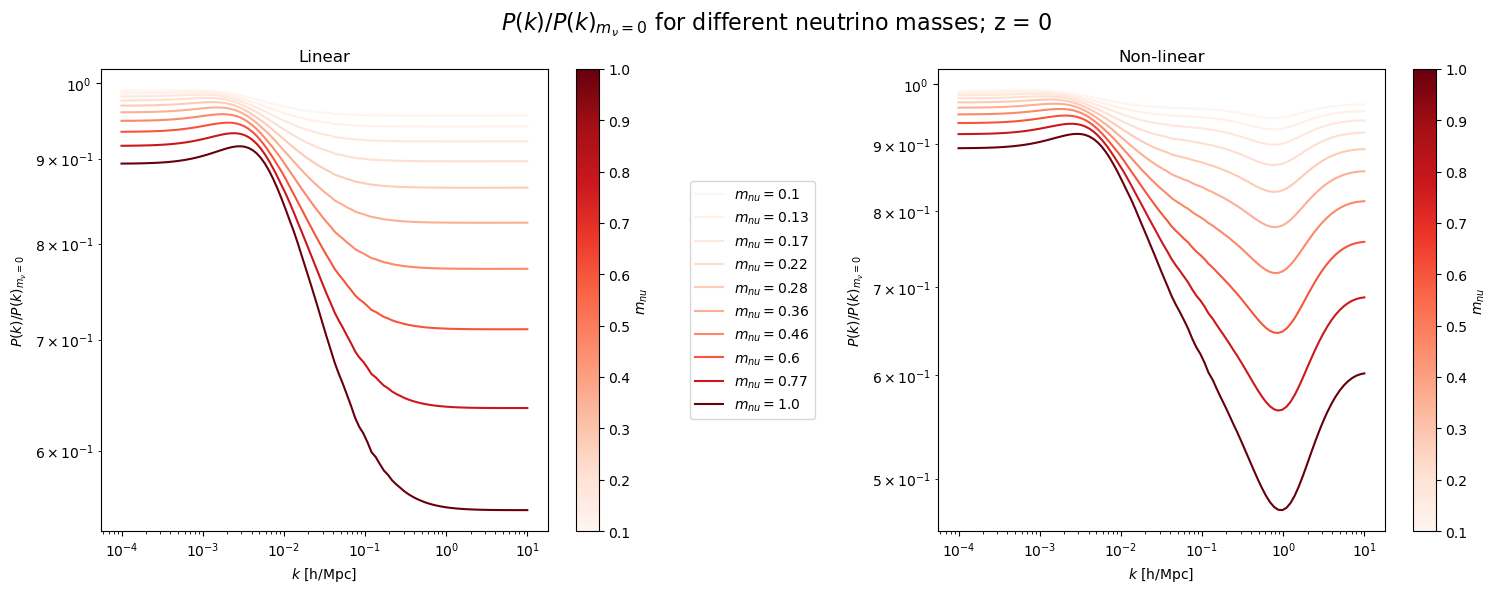

In [32]:
# First we define the prior on the neutrino masses:
m_nu_prior = np.geomspace(0.1, 1, 10) # in the priors from DES we find the use of (0, 1) in eV, since we purposefully plot P(k) for m_nu = 0, we exclude 0 from the prior

# For local control of the redshift: 
a = 1

# Define the linear and non-linear power spectra:
m_nu_lin = loop_comso_lin(m_nu_prior, r"m_nu")
m_nu_0_lin = loop_comso_lin([0], r"m_nu")
m_nu_non_lin = loop_comso_non_lin(m_nu_prior, r"m_nu")
m_nu_0_non_lin = loop_comso_non_lin([0], r"m_nu")

# In one list, to make the loop for plotting easier:
p_k_nu = [m_nu_lin, m_nu_non_lin]
p_k_nu_0 = [m_nu_0_lin, m_nu_0_non_lin]
titles = ["Linear", "Non-linear"]

# Initiate the plot:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
fig.suptitle(r"$P(k)/P(k)_{m_\nu=0}$ for different neutrino masses; z = 0", fontsize=16)
fig.subplots_adjust(wspace=0.5)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 2):
    # Define the range of the colors in the plot
    norm = mcolors.Normalize(vmin=min(m_nu_prior), vmax=max(m_nu_prior))
    for i in range(len(m_nu_prior)):

        # Make a ScalarMappable for the colorbar
        color = cmap(norm(m_nu_prior[i]))
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[j].loglog(k, p_k_nu[j][i]/(p_k_nu_0[j][0]), color=color, label=r"$m_{nu}$" + r"$= {}$".format(np.round(m_nu_prior[i], 2)))
        
        # Add titles, labels:
        axes[j].set_title(titles[j])
        axes[j].set_xlabel(r'$k$ [h/Mpc]')
        axes[j].set_ylabel(r'$P(k)/P(k)_{m_\nu=0}$')
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar = fig.colorbar(sm, ax=axes[j], label=r"$m_{nu}$")

    # Plot the legend himself:
    axes[0].legend(loc='center right', bbox_to_anchor=(1.615, 0.5),
          ncol=1, fancybox=True)

plt.show()

## Interpretation of the neutrino mass effect
Mainly focus on the linear plot?

# Find a way to plot the effect of $N_{eff}$; indirectly $\sum m_{\nu}$
- Neutrinos cluster over longer scales(due to their mass?), this causes a suppression of the growth of structure. **Thus** we can plot the growth over scales for different neutrino masses?
- plot the change of $N_{eff}$ together with a change in $H_{0}$ for P(k)

/tmp/ipykernel_1844/2889836783.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


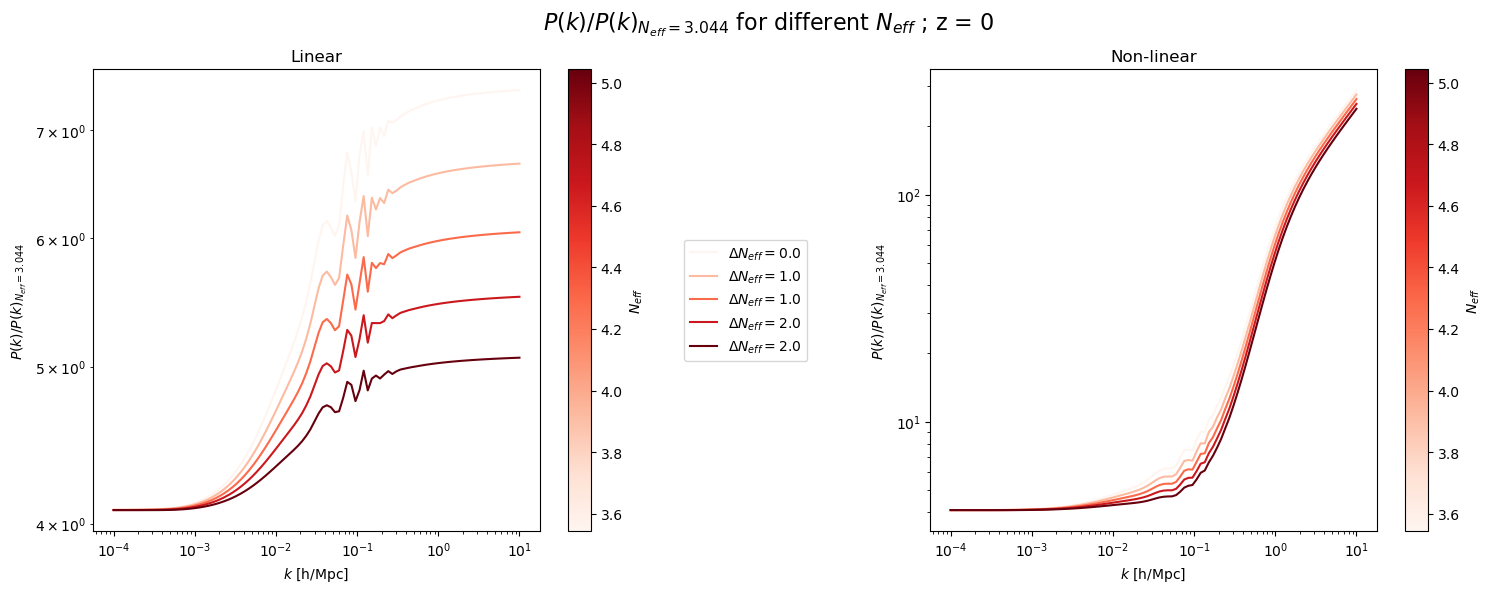

In [50]:
# Using the priors for N_eff we defined above, and for local control of the redshift: 
n_eff_prior = np.linspace(3.544, 5.044, 5)
a = 1

# TODO: Add a change in the Hubble rate psimultaneous with the change in Neff:
#h_prior = h_prior * 2

# Define the linear and non-linear power spectra:
n_eff_lin = loop_comso_lin((n_eff_prior - 3.044), r"Neff")
n_eff_non_lin = loop_comso_non_lin((n_eff_prior - 3.044), r"Neff")

# Initiate the plot:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
fig.suptitle(r"$P(k)/P(k)_{N_{eff}=3.044}$ for different $N_{eff}$ ; z = 0", fontsize=16)
fig.subplots_adjust(wspace=0.5)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.

# Define the range of the colors in the plot
norm = mcolors.Normalize(vmin=min(n_eff_prior), vmax=max(n_eff_prior))
for i in range(len(n_eff_prior)):

    # Make a ScalarMappable for the colorbar
    color = cmap(norm(n_eff_prior[i]))
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # To avoid errors
        
    # Split the subplots per row, the first row for j = 0, 1, 2
    # First row:
    axes[0].loglog(k, n_eff_lin[i]/vanilla_lcdm, color=color, label=r"$\Delta N_{eff}$" + r"$= {}$".format(np.round(n_eff_prior[i] - 3.044), 2))
    #axes[0].loglog(k, vanilla_lcdm/vanilla_lcdm, color="k")
    
    # Add titles, labels:
    axes[0].set_title("Linear")
    axes[0].set_xlabel(r'$k$ [h/Mpc]')
    axes[0].set_ylabel(r'$P(k)/P(k)_{N_{eff}=3.044}$')
    
    # Second plot
    axes[1].loglog(k, n_eff_non_lin[i]/(vanilla_lcdm), color=color)
    #axes[1].loglog(k, vanilla_lcdm/vanilla_lcdm, color="k")
    
    # Add titles, labels:
    axes[1].set_title("Non-linear")
    axes[1].set_xlabel(r'$k$ [h/Mpc]')
    axes[1].set_ylabel(r'$P(k)/P(k)_{N_{eff}=3.044}$')
    
# Add colorbar to the subplots in row 1 & 2 respectively:
cbar = fig.colorbar(sm, ax=axes[0], label=r"$N_{eff}$")
cbar = fig.colorbar(sm, ax=axes[1], label=r"$N_{eff}$")

# Plot the legend himself:
axes[0].legend(loc='center right', bbox_to_anchor=(1.615, 0.5),
      ncol=1, fancybox=True)

plt.show()